In [1]:
pip install numpy==1.21.6

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas==1.3.5

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install imageio-ffmpeg==0.5.1

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install gym==0.22

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install matplotlib==3.5.3


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install gym_minigrid==1.0.3

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install imageio-ffmpeg==0.5.1

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [18]:
import numpy as np
import os
import pandas as pd
import random
from collections import defaultdict
import gym
import gym_minigrid
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
from collections import defaultdict
import numpy as np

class QLearning:
    def __init__(self, actions, agent_indicator=10):
        self.actions = actions
        self.agent_indicator = agent_indicator
        self.alpha = 0.01  
        self.gamma = 0.9
        self.epsilon = 0.2  
        self.q_values = defaultdict(lambda: [0.0] * actions)

    def _convert_state(self, s):
        return np.where(s == self.agent_indicator)[0][0]

    def update(self, state, action, reward, next_state, next_action):
        state = self._convert_state(state)
        next_state = self._convert_state(next_state)

        q_value = self.q_values[state][action]

        ################## write code ################################
        next_q_value = max(self.q_values[next_state])  
        
        td_error = reward + self.gamma * next_q_value - q_value
        
        self.q_values[state][action] += self.alpha * td_error
        ##############################################################
    
    def act(self, state):
        if np.random.rand() < self.epsilon:
            action = np.random.choice(self.actions)
        else:
            state = self._convert_state(state)
            q_values = self.q_values[state]
            action = np.argmax(q_values)
        return action


In [20]:
from utils import gen_wrapped_env, show_video

In [21]:
!python3 utils.py

In [22]:
env = gen_wrapped_env('MiniGrid-Empty-6x6-v0')

obs = env.reset()

agent_position = obs[0]

agent = QLearning(3, agent_position)

In [23]:
rewards = []
for ep in range(20000):
    done = False
    obs = env.reset()
    action = agent.act(obs)
    
    ep_rewards = 0
    while not done:
        next_obs, reward, done, info = env.step(action)

        next_action = agent.act(next_obs)

        agent.update(obs, action, reward, next_obs, next_action)
        
        ep_rewards += reward
        obs = next_obs
        action = next_action
    rewards.append(ep_rewards)
    if (ep+1) % 20 == 0:
        print("episode: {}, rewards: {}".format(ep+1, ep_rewards))
env.close()

episode: 20, rewards: 0
episode: 40, rewards: 0
episode: 60, rewards: 0
episode: 80, rewards: 0
episode: 100, rewards: 0
episode: 120, rewards: 0
episode: 140, rewards: 0
episode: 160, rewards: 0.3879999999999999
episode: 180, rewards: 0
episode: 200, rewards: 0
episode: 220, rewards: 0
episode: 240, rewards: 0
episode: 260, rewards: 0
episode: 280, rewards: 0.748
episode: 300, rewards: 0.5680000000000001
episode: 320, rewards: 0.20799999999999996
episode: 340, rewards: 0.6579999999999999
episode: 360, rewards: 0.42399999999999993
episode: 380, rewards: 0.712
episode: 400, rewards: 0
episode: 420, rewards: 0.118
episode: 440, rewards: 0.712
episode: 460, rewards: 0.586
episode: 480, rewards: 0.856
episode: 500, rewards: 0
episode: 520, rewards: 0.802
episode: 540, rewards: 0.352
episode: 560, rewards: 0
episode: 580, rewards: 0
episode: 600, rewards: 0.82
episode: 620, rewards: 0.6759999999999999
episode: 640, rewards: 0
episode: 660, rewards: 0
episode: 680, rewards: 0
episode: 700, r

In [24]:
{s:np.round(q, 5).tolist() for s, q in agent.q_values.items()}

{0: [0.03916, 0.03921, 0.04452],
 12: [0.06459, 0.06446, 0.06978],
 15: [0.08015, 0.08616, 0.11111],
 24: [0.08502, 0.08535, 0.09843],
 3: [0.03526, 0.03522, 0.04106],
 6: [0.03884, 0.03871, 0.04251],
 9: [0.0431, 0.04316, 0.04603],
 21: [0.15829, 0.15863, 0.16356],
 18: [0.10614, 0.11047, 0.14497],
 27: [0.16902, 0.17513, 0.23516],
 36: [0.09877, 0.09837, 0.11013],
 30: [0.21243, 0.22239, 0.29689],
 39: [0.36802, 0.36926, 0.40326],
 33: [0.31648, 0.31612, 0.33146],
 45: [0.0, 0.0, 0.0],
 42: [0.49008, 0.49089, 0.54579]}

In [25]:
show_video()

In [26]:
os.makedirs('./logs', exist_ok=True)
pd.Series(rewards).to_csv('./logs/rewards_qlearning.csv')

In [27]:
from collections import defaultdict
import numpy as np

class SARSA:
    def __init__(self, actions, agent_indicator=10):
        self.actions = actions
        self.agent_indicator = agent_indicator
        self.alpha = 0.01  
        self.gamma = 0.9    
        self.epsilon = 0.2  
        self.q_values = defaultdict(lambda: [0.0] * actions)

    def _convert_state(self, s):
        return np.where(s == self.agent_indicator)[0][0]

    def update(self, state, action, reward, next_state, next_action):
        state = self._convert_state(state)
        next_state = self._convert_state(next_state)
        
        q_value = self.q_values[state][action]

        ################ Write Code #####################
        next_q_value = self.q_values[next_state][next_action]  

        td_error = reward + self.gamma * next_q_value - q_value
        
        self.q_values[state][action] += self.alpha * td_error
        #################################################
    
    def act(self, state):
        if np.random.rand() < self.epsilon:
            action = np.random.choice(self.actions)
        else:
            state = self._convert_state(state)
            q_values = self.q_values[state]
            action = np.argmax(q_values)
        return action


In [28]:
env = gen_wrapped_env('MiniGrid-Empty-6x6-v0')
obs = env.reset()

agent_position = obs[0]

agent = SARSA(3, agent_position)

In [29]:
rewards = []
for ep in range(20000):
    done = False
    obs = env.reset()
    action = agent.act(obs)
    
    ep_rewards = 0
    while not done:
        next_obs, reward, done, info = env.step(action)

        next_action = agent.act(next_obs)

        agent.update(obs, action, reward, next_obs, next_action)
        
        ep_rewards += reward
        obs = next_obs
        action = next_action
    rewards.append(ep_rewards)
    if (ep+1) % 20 == 0:
        print("episode: {}, rewards: {}".format(ep+1, ep_rewards))
env.close()

episode: 20, rewards: 0
episode: 40, rewards: 0
episode: 60, rewards: 0
episode: 80, rewards: 0
episode: 100, rewards: 0
episode: 120, rewards: 0
episode: 140, rewards: 0
episode: 160, rewards: 0
episode: 180, rewards: 0
episode: 200, rewards: 0
episode: 220, rewards: 0
episode: 240, rewards: 0
episode: 260, rewards: 0
episode: 280, rewards: 0
episode: 300, rewards: 0
episode: 320, rewards: 0
episode: 340, rewards: 0
episode: 360, rewards: 0
episode: 380, rewards: 0
episode: 400, rewards: 0
episode: 420, rewards: 0
episode: 440, rewards: 0
episode: 460, rewards: 0
episode: 480, rewards: 0
episode: 500, rewards: 0
episode: 520, rewards: 0
episode: 540, rewards: 0
episode: 560, rewards: 0
episode: 580, rewards: 0
episode: 600, rewards: 0.802
episode: 620, rewards: 0
episode: 640, rewards: 0
episode: 660, rewards: 0.262
episode: 680, rewards: 0
episode: 700, rewards: 0.874
episode: 720, rewards: 0
episode: 740, rewards: 0.622
episode: 760, rewards: 0.5680000000000001
episode: 780, rewards

In [30]:
{s:np.round(q, 5).tolist() for s, q in agent.q_values.items()}

{0: [0.02646, 0.02655, 0.03258],
 12: [0.04786, 0.04798, 0.05559],
 3: [0.02302, 0.02332, 0.02569],
 15: [0.06333, 0.06518, 0.08663],
 6: [0.02654, 0.02665, 0.02935],
 24: [0.06572, 0.0656, 0.07784],
 18: [0.0858, 0.08659, 0.12325],
 27: [0.13912, 0.13888, 0.19545],
 30: [0.18293, 0.18588, 0.27003],
 39: [0.32679, 0.33147, 0.39064],
 33: [0.28385, 0.27868, 0.35205],
 36: [0.08107, 0.08126, 0.10893],
 9: [0.02898, 0.02917, 0.03231],
 21: [0.13537, 0.1359, 0.14517],
 42: [0.46935, 0.4664, 0.51527],
 45: [0.0, 0.0, 0.0]}

In [31]:
show_video()

In [32]:
os.makedirs('./logs', exist_ok=True)
pd.Series(rewards).to_csv('./logs/rewards_sarsa.csv')

In [33]:
sarsa_logs = pd.read_csv('./logs/rewards_sarsa.csv', index_col=False).iloc[:, 1]
q_logs = pd.read_csv('./logs/rewards_qlearning.csv', index_col=False).iloc[:, 1]

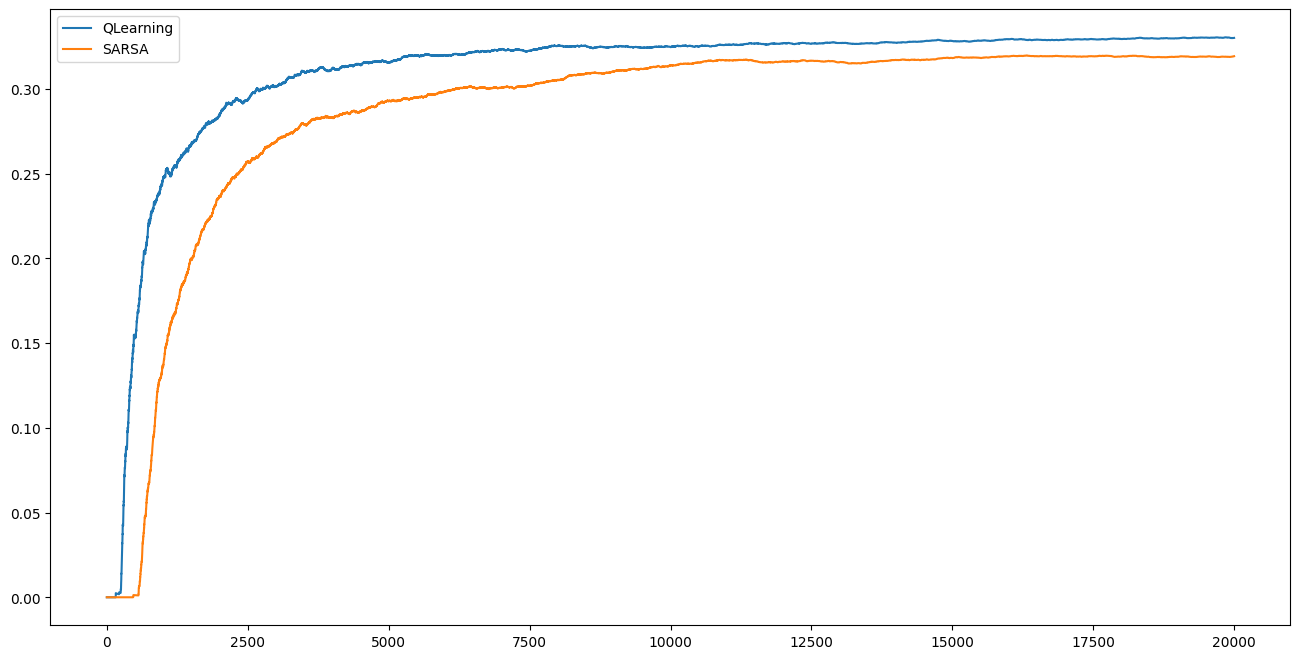

In [34]:
plt.figure(figsize=(16, 8))
plt.plot(q_logs.cumsum() / (pd.Series(np.arange(q_logs.shape[0]))+1), label="QLearning")
plt.plot(sarsa_logs.cumsum() / (pd.Series(np.arange(sarsa_logs.shape[0]))+1), label="SARSA")
plt.legend()